In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math

plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

font = {'family' : 'serif',
        'weight' : 'normal'}

plt.rc('font', **font)

In [0]:
#Cargamos los archivos desde el panel izquierdo y después corremos este código

resdata = [1,2,3,4,5,6,7]#,7,8,9,10,12,13,14] #Para excluir la medición test_data_2 y test_data_11
data = []
for i in resdata:
  data.append(np.loadtxt('res_data{}.txt'.format(i)))

  


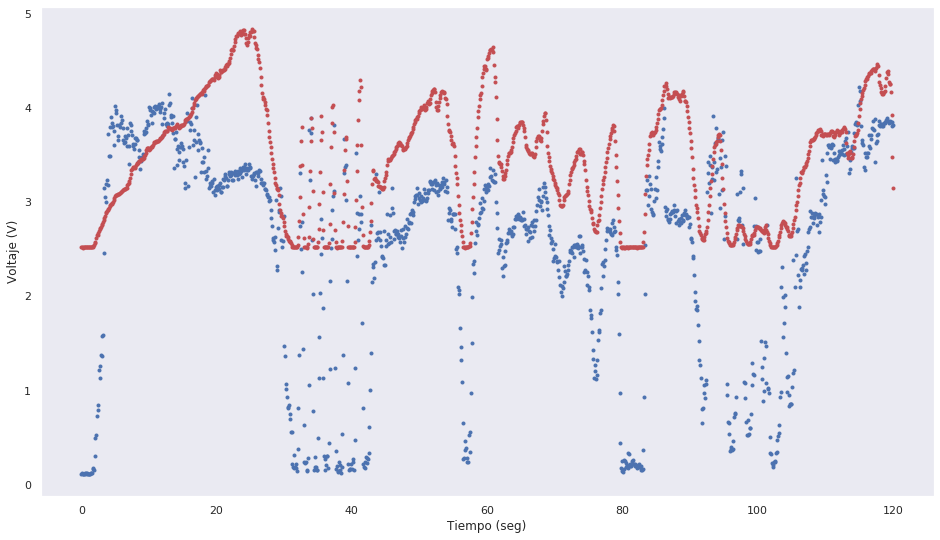

In [8]:
i = 2


plt.figure(figsize=(16,9))
plt.plot(data[i][:,0], Voltaje_V[i], 'b.', label=label[i])
plt.plot(data[i][:,0], data[i][:,2], 'r.', label=label[i])

plt.xlabel('Tiempo (seg)')
plt.ylabel('Voltaje (V)')
plt.grid()

In [0]:
def fuerza(volt):
  a=26.7191#26.78885525
  b=-67.29186 #-67.40046261
  sigma_a=0.00587 #0.05
  sigma_b=0.0126 #0.05
  f = a*volt + b
  return f


In [0]:
#Tiempo=[]
Fuerza_V = []
Voltaje_V = []

for i in range(7):
  F = fuerza(data[i][:,2])
  V = data[i][:,3]#*5/1023
  Voltaje_V.append(V)
  Fuerza_V.append(F)


In [0]:
Fuerza_ordenada=[]
Voltaje_ordenado=[]
orden=[4,3,5,2,1,6,0]
for i in orden:
  Fuerza_ordenada.append(Fuerza_V[i])
  Voltaje_ordenado.append(Voltaje_V[i])

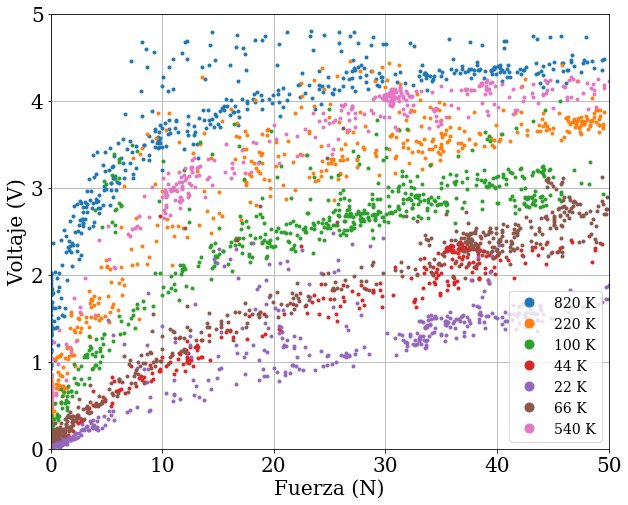

In [11]:
label=['820 K', '220 K', '100 K', '44 K', '22 K', '66 K', '540 K']
#fmt = ['r.', 'b.', 'k.', 'g.', 'c.', 'y.', 'c.']

inicio=400
fin=1000
plt.figure(figsize=(10,8))
for i in range(7):
  
  plt.plot(Fuerza_V[i][inicio:fin], Voltaje_V[i][inicio:fin], '.', label=label[i])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.xlim(0,50)
  plt.ylim(0,5)
  plt.legend(fontsize=14, markerscale=3.)
  plt.grid()
plt.show()

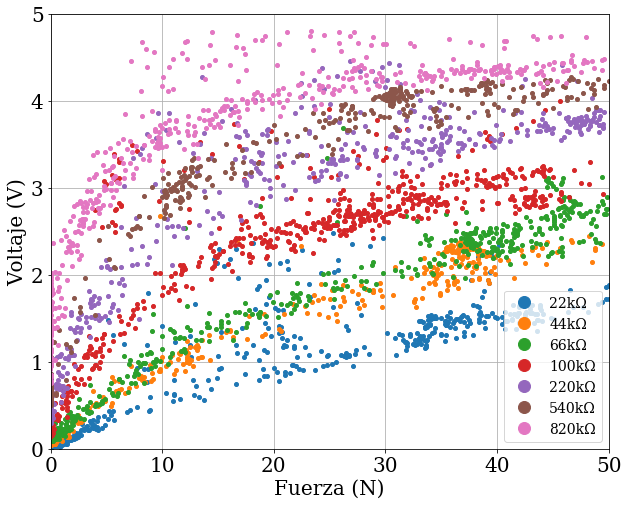

In [19]:
label=['22kΩ','44kΩ','66kΩ','100kΩ','220kΩ','540kΩ','820kΩ']
#fmt = ['r.', 'b.', 'k.', 'g.', 'c.', 'y.', 'c.']

inicio=400
fin=1000
plt.figure(figsize=(10,8))
for i in range(7):
  
  plt.plot(Fuerza_ordenada[i][inicio:fin], Voltaje_ordenado[i][inicio:fin], '.',markersize=8, label=label[i])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.xlim(0,50)
  plt.ylim(0,5)
  plt.legend(fontsize=14, markerscale=3.)
  plt.grid()
plt.show()

In [0]:
long = len(data[0][:,0])
#Defino tiempo y fuerza del sensor Vernier
Tiempo_V=[]
Fuerza_V=[]
for i in range(12):
  Tiempo_Vaux = []
  Fuerza_Vaux = []
  for j in range(long):
    Tiempo_Vaux.append(np.array(round(data[i][j,0],2)))
    Fuerza_Vaux.append(np.array(fuerza(data[i][j,1])))
  Tiempo_V.append(Tiempo_Vaux)
  Fuerza_V.append(Fuerza_Vaux)

#Redefino tiempos Sensores restando offset inicial y el voltaje lo paso a V  
Tiempo_S=[]
Voltaje_S=[]
for i in range(12): 
  Tiempo_S.append(redondeo((tanda[i][:,0] - tanda[i][0,0])/1000))
  Voltaje_S.append(tanda[i][:,1]*5/1023)
  #Tiempo_S.append(np.array(redondeo(np.array((eval('tanda'+str(i)).tiempo-eval('tanda'+str(i)).tiempo.iloc[0])/1000))))
  #Voltaje_S.append(np.array(eval('tanda'+str(i)).lectura*5/1023))

#Redefino tiempos Sensores restando offset delay
Tiempo_Sensor=[]
Voltaje_Sensor=[]
for i in range(12):
  T=[]
  V=[]
  for j in range(len(Tiempo_S[i])):
    if 0<=Tiempo_S[i][j]<20:
      T.append(round(Tiempo_S[i][j]+offset[i,0],2))
      V.append(Voltaje_S[i][j])
    elif 20<=Tiempo_S[i][j]<40:
      T.append(round(Tiempo_S[i][j]+offset[i,1],2))
      V.append(Voltaje_S[i][j])
    elif 40<=Tiempo_S[i][j]<60:
      if Tiempo_S[i][j]+offset[i,2]<60:
        T.append(round(Tiempo_S[i][j]+offset[i,2],2))
        V.append(Voltaje_S[i][j])
  Tiempo_Sensor.append(T) 
  Voltaje_Sensor.append(V)

Tiempo_Vernier=[]
Fuerza_Vernier=[] 
for i in range(12):
  indices_selec=[]
  Tv, Fv = [], []
  for t in Tiempo_Sensor[i]:
    if 0<=t<60:
      indices_selec.append(int(Tiempo_V[i].index(t)))
      Tv.append(Tiempo_V[i][indices_selec[-1]])
      Fv.append(Fuerza_V[i][indices_selec[-1]])
  Tiempo_Vernier.append(Tv)
  Fuerza_Vernier.append(Fv) 

Voltaje_error=[] #La semidiferencia entre dos voltajes seguidos. Juega el rol de error por mala corrección en tiempos
for i in range(12):
  erraux=[]
  for j in range(len(Voltaje_Sensor[i])-1):
    erraux.append(np.abs(Voltaje_Sensor[i][j+1]-Voltaje_Sensor[i][j])/2)
  erraux.append(erraux[-1])
  Voltaje_error.append(erraux)
#Defino el error de voltaje del Sensor (calculado en Calibracion_estatica.ipynb) y del Vernier sacado del manual

err_Voltaje = 0.143 #Lo que oscila el voltaje en una medicion "constante"

Error_Voltaje=[]
err_Fuerza = 0.05
for i in range(len(Voltaje_error)):
  Error_Voltaje.append(np.sqrt(np.array(Voltaje_error[i])**2+err_Voltaje**2))

In [0]:
for i in range(12):  
  plt.figure(figsize=(10,7))
  fig, ax1 = plt.subplots(figsize=(10,7))
  num=i

  color = 'tab:blue'
  ax1.set_xlabel('Tiempo (s)')
  ax1.set_ylabel('Fuerza Vernier (N)', color=color)
  ax1.plot(Tiempo_Vernier[num],Fuerza_Vernier[num],'.-',label='Vernier', color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_ylim(0,50)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:orange'
  ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
  ax2.plot(Tiempo_Sensor[num],Voltaje_Sensor[num],'.-',label='Sensor', color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.set_ylim(0,5)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  ax1.grid()
  plt.xlim(0,60)
  plt.show()

In [0]:
plt.figure(figsize=(12,20))
for i in range(12):
  plt.subplot(7,2,i+1)
  med = i
  plt.plot(Fuerza_Vernier[med],Voltaje_Sensor[med],'g.')
  plt.plot(data15[0,:], data15[1,:], 'b.', label=('Maxs estaticas'))
  plt.plot(data16[0,:], data16[1,:], 'b.', label=('Mins estaticas'))
  plt.plot(data17[0,:], data17[1,:], 'b.', label=('Medias estaticas'))
  plt.grid()
  plt.legend()
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.rc('axes', labelsize=12)
  plt.rc('xtick', labelsize=12)
  plt.rc('ytick', labelsize=12)
  plt.xlim(-1,50)
  plt.tight_layout()
  plt.grid()
  
plt.show()